In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
Nt = 1
Nx = 1
Ny = 1

deltax = 0.2
deltay = 0.2
deltat = 0.1

x = np.arange(0,1.2,deltax)
y = np.arange(0,1.2,deltay)
t = np.arange(0,1.2,deltat)

k = 0.1

lambda_ = (k*deltat)/deltax**2
mu_ = (k*deltat)/deltay**2

print(lambda_,mu_)

0.25 0.25


In [3]:
x

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [4]:
def Ti(x,y):
    return 10*np.sin(np.pi*(x+y))
def h1(t,x):
    return np.exp(-2*t*np.pi**2)*np.sin(np.pi*x)
def h2(t,x):
     return np.exp(-2*t*np.pi**2)*np.sin(np.pi*(1+x))
def h3(t,y):
    return np.exp(-2*t*np.pi**2)*np.sin(np.pi*y)
def h4(t,y):
     return np.exp(-2*t*np.pi**2)*np.sin(np.pi*(1+y))

In [5]:
def InitT():
    
    T = np.zeros((len(t),len(x),len(y)))
    
    T[0,:,:] = Ti(x,y)
    T[0,:,0] = h1(0,x)
    T[0,:,-1] = h2(0,x)
    T[0,0,:] = h3(0,y)
    T[0,-1,:] = h4(0,y)
    
    return T

In [6]:
T = InitT()
#print(T[0,:,:])

In [7]:
T

array([[[ 0.00000000e+00,  5.87785252e-01,  9.51056516e-01,
          9.51056516e-01,  5.87785252e-01,  1.22464680e-16],
        [ 5.87785252e-01,  9.51056516e+00,  5.87785252e+00,
         -5.87785252e+00, -9.51056516e+00, -5.87785252e-01],
        [ 9.51056516e-01,  9.51056516e+00,  5.87785252e+00,
         -5.87785252e+00, -9.51056516e+00, -9.51056516e-01],
        [ 9.51056516e-01,  9.51056516e+00,  5.87785252e+00,
         -5.87785252e+00, -9.51056516e+00, -9.51056516e-01],
        [ 5.87785252e-01,  9.51056516e+00,  5.87785252e+00,
         -5.87785252e+00, -9.51056516e+00, -5.87785252e-01],
        [ 1.22464680e-16, -5.87785252e-01, -9.51056516e-01,
         -9.51056516e-01, -5.87785252e-01, -2.44929360e-16]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.0

In [8]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
        T[l,0,:] = h3(t[l],y)
        T[l,-1,:] = h4(t[l],y)
        T[l,:,0] = h1(t[l],x)
        T[l,:,-1] = h2(t[l],x)
        
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                T[l,i,j] = (1-2*lambda_-2*mu_)*T[l-1,i,j] + \
                lambda_*(T[l-1,i+1,j] + T[l-1,i-1,j]) + \
                mu_*(T[l-1,i,j+1] + T[l-1,i,j-1])
                
                

In [9]:
GetSolution()

100%|███████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 10990.32it/s]


<IPython.core.display.Javascript object>


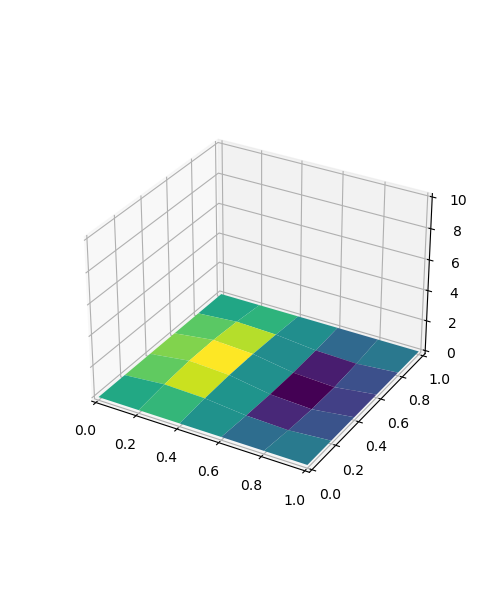

In [10]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_zlim3d(0,10)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,T[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)